In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

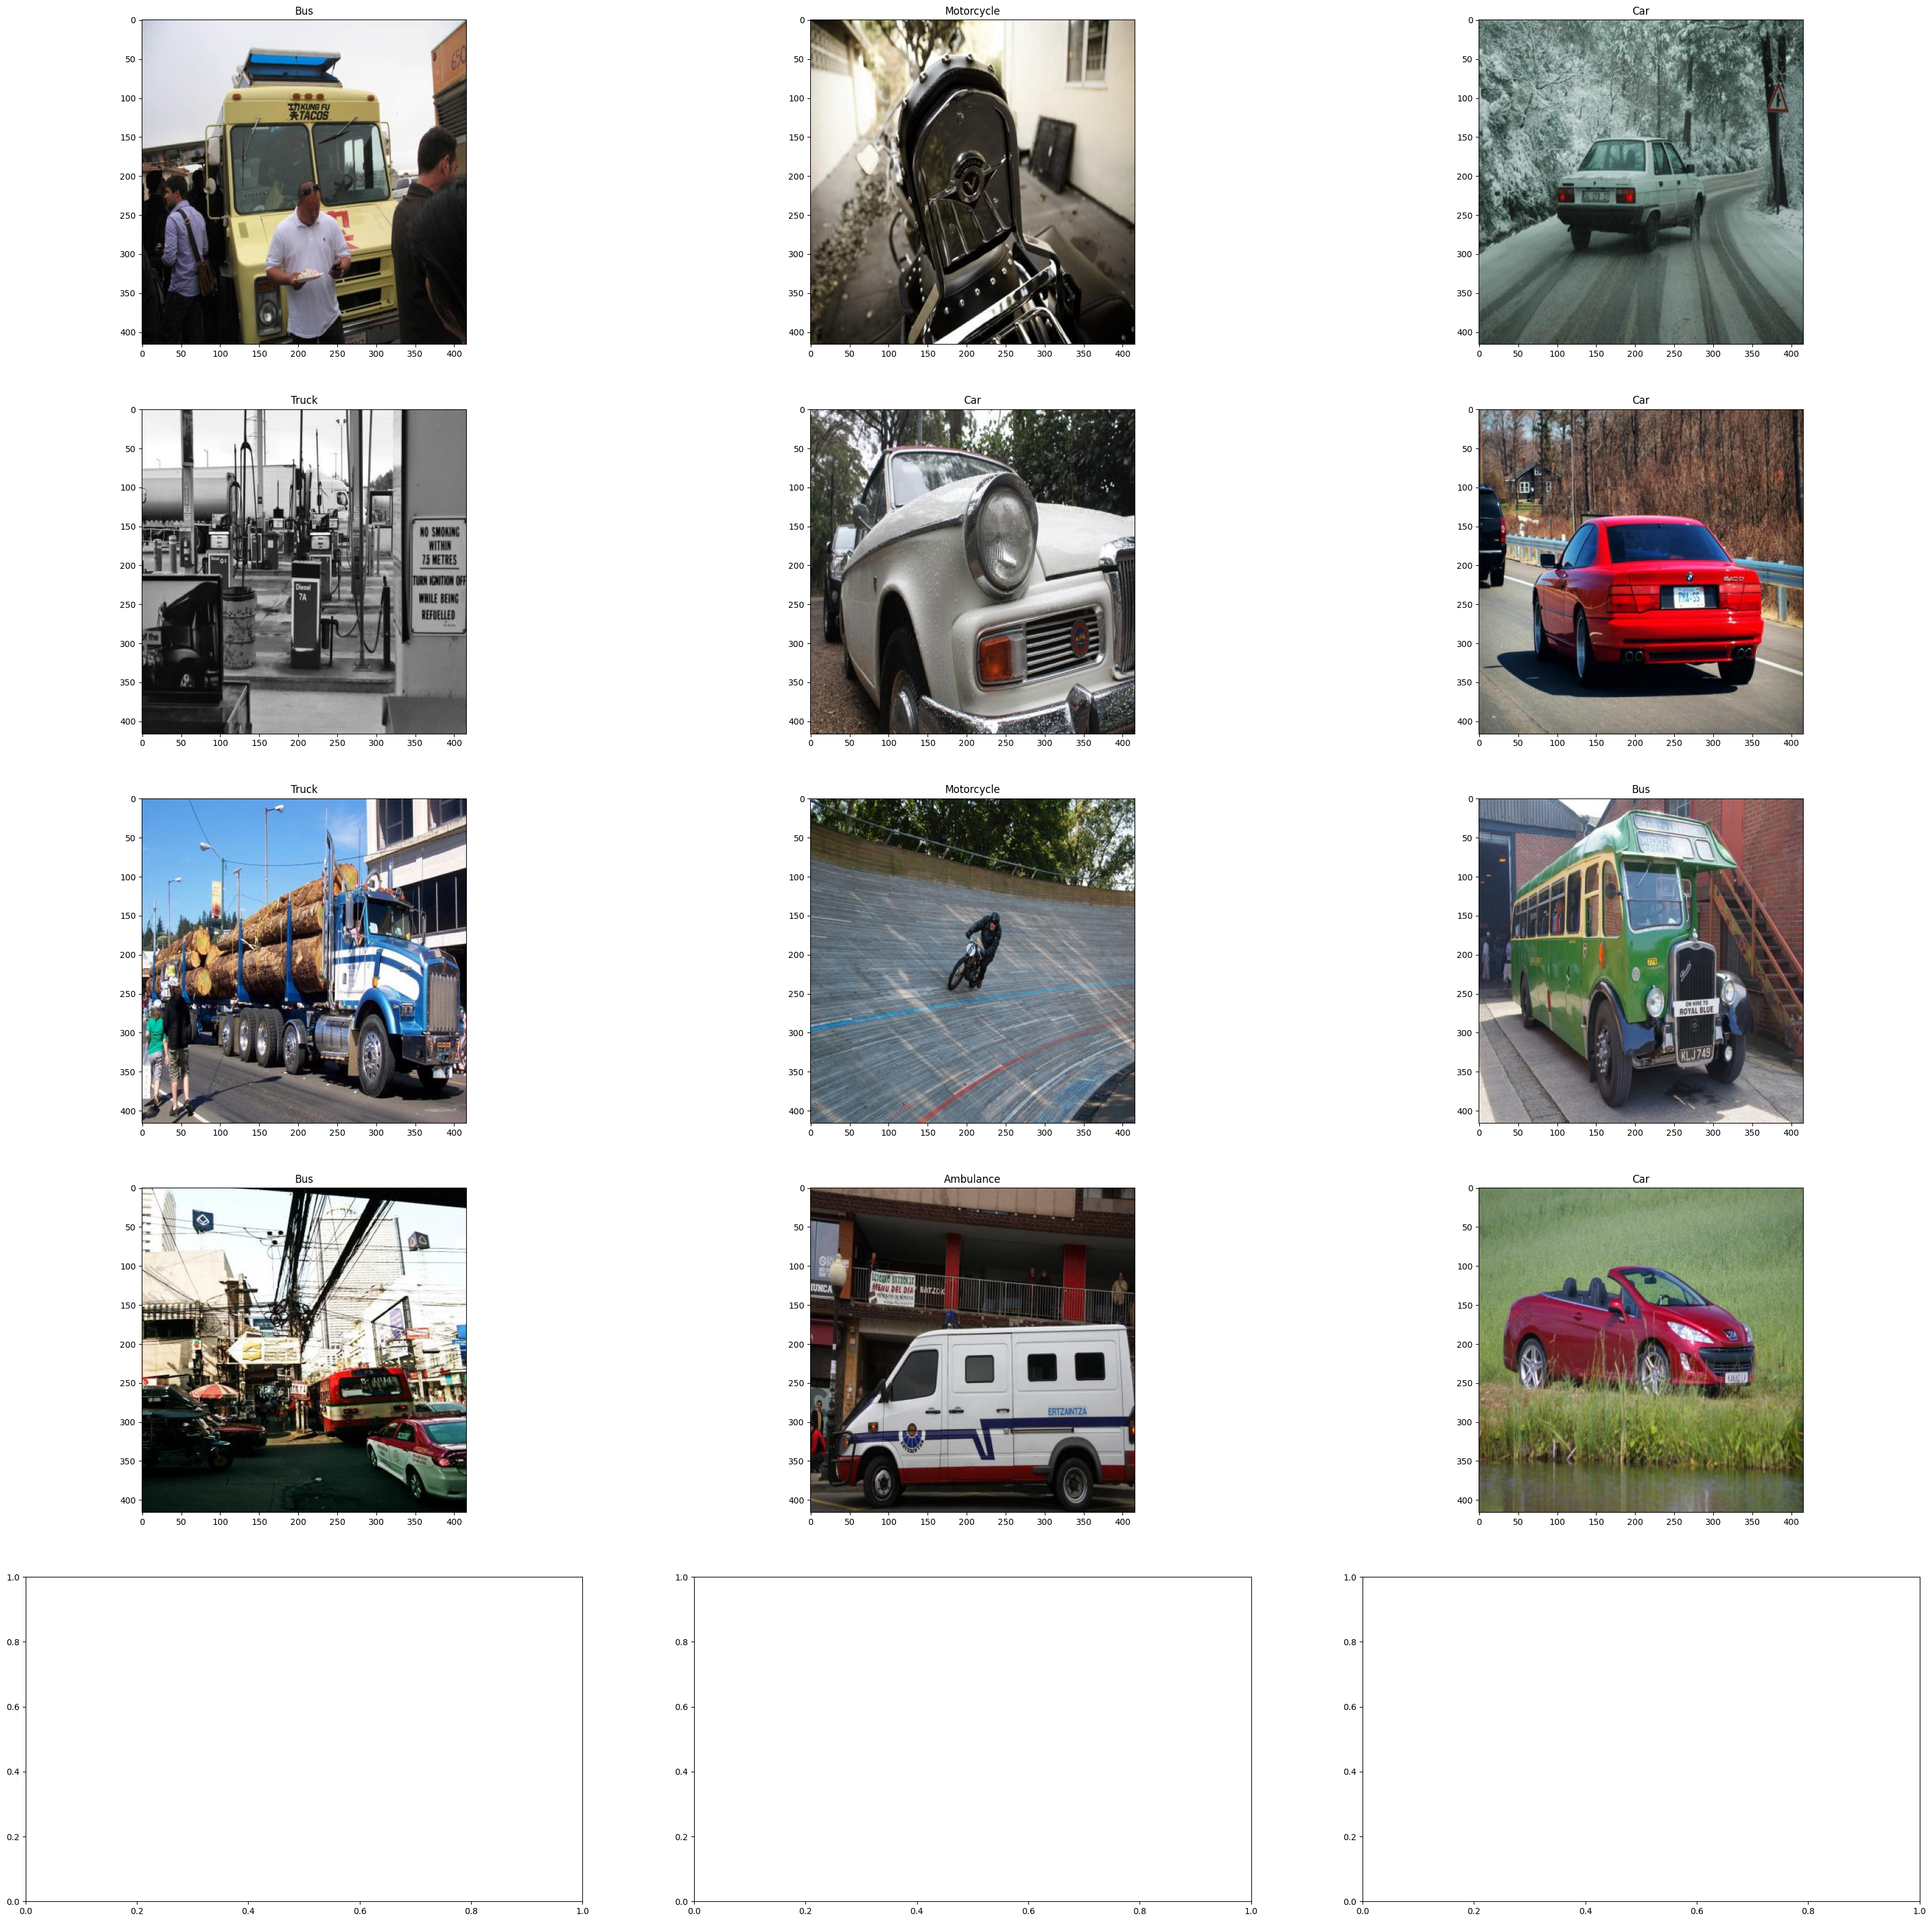

In [2]:
classes = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']


def display_set(set_name, n):
    training_set = os.listdir('data/Cars Detection/'+set_name+'/images/')
    sample = np.random.choice(training_set, n)
    fig, ax = plt.subplots(nrows=n//3+1, ncols=3, figsize=(40, 40))
    for i, img in enumerate(sample):
        image = plt.imread('data/Cars Detection/'+set_name+'/images/' + img)
        ax[i//3,i%3].imshow(image)
        annotation = img.replace('.jpg', '.txt')
        with open('data/Cars Detection/'+set_name+'/labels/' + annotation) as f:
            line = f.readline().split()
            class_index = int(line[0])
            
            ax[i//3,i%3].title.set_text(classes[class_index])
    plt.show()


display_set('train', 12)

In [3]:
from ultralytics import YOLO
coco_model = YOLO('yolov8n.pt')
vehicles = [2, 3, 5, 7]
print([coco_model.names[vehicle] for vehicle in vehicles])


['car', 'motorcycle', 'bus', 'truck']



0: 640x640 1 car, 2 trucks, 334.3ms
Speed: 12.0ms preprocess, 334.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


[[3.9293975830078125, 117.00531768798828, 388.6692810058594, 354.0983581542969, 0.6146767735481262], [0.10303039103746414, 108.8416519165039, 177.68890380859375, 223.9449462890625, 0.4930209815502167], [4.042742729187012, 116.74887084960938, 389.41607666015625, 360.3310546875, 0.4804840683937073]]


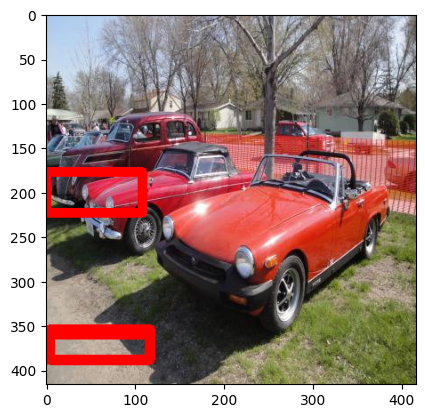

In [7]:


def select_cars(set_name, n):
    training_set = os.listdir('data/Cars Detection/'+set_name+'/images/')
    sample = np.random.choice(training_set, n)

    sample = np.random.choice(training_set, n)
    for img in sample:
        frame = plt.imread('data/Cars Detection/'+set_name+'/images/' + img)
        detections = coco_model.predict(frame)[0]
        detections_ = []
        for detection in detections.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = detection
            # if int(class_id) in vehicles:
            detections_.append([x1, y1, x2, y2, score])
            frame = cv2.rectangle(frame, (int(x1), int(x2)), (int(y1), int(y2)), (255, 0, 0), 10)
        plt.imshow(frame)
        # track vehicles
        track_ids = None
        
        return detections_
        return 

print(select_cars('train', 1))
